In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
import pylab

%matplotlib inline

In [2]:
df = pd.read_csv('eurotunnel_3_months.csv')

In [3]:
df.head()

,terminal,servicetype,departures,waitingtimeminutes,journeytimeminutes,delayreason,retrievaldate,latitude,longitude,trend
0,UK,normal,6,0,60,none/unknown,2018-02-01 00:13:06.432,51.0963,1.13505,stable
1,F,normal,4,0,60,none/unknown,2018-02-01 00:13:06.57,50.9239,1.81604,stable
2,UK,normal,6,0,60,none/unknown,2018-02-01 00:42:53.941,51.0963,1.13505,stable
3,F,normal,5,0,60,none/unknown,2018-02-01 00:42:54.08,50.9239,1.81604,stable
4,UK,normal,4,0,60,none/unknown,2018-02-01 01:12:54.094,51.0963,1.13505,stable


In [4]:
ts_uk = df[df.terminal == 'UK']
ts_fr = df[df.terminal == 'F']

In [5]:
def make_poly(x, y, grade=3):
    z = np.polyfit(x, y, grade)
    poli = np.poly1d(z)
    return poli

In [6]:
x = np.array(range(0,len(ts_uk)))
y = ts_uk['waitingtimeminutes']

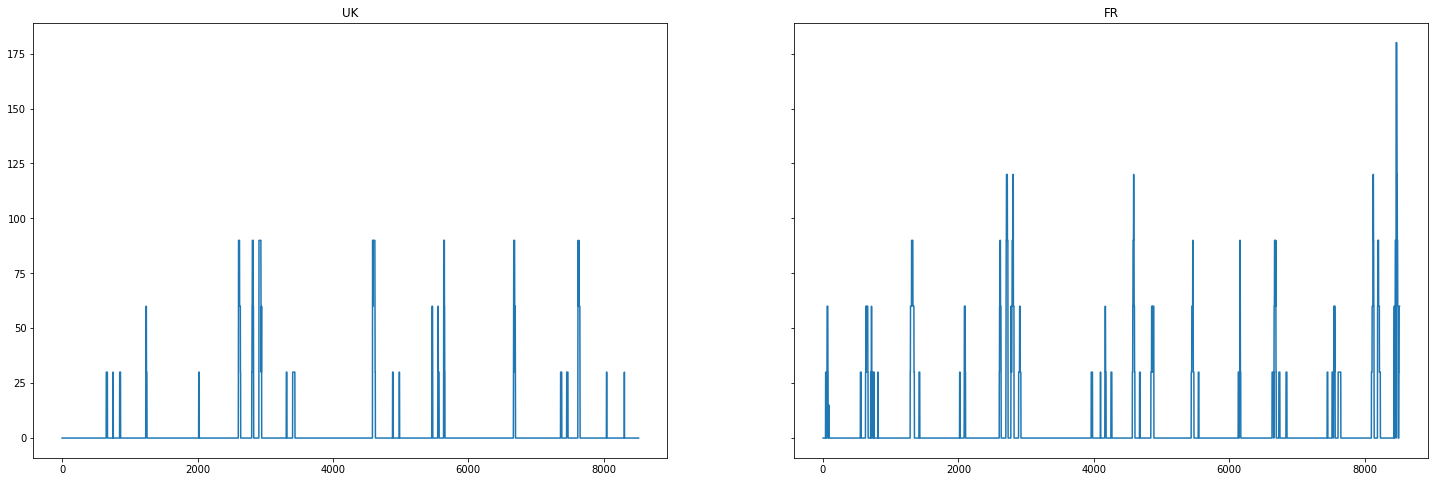

In [8]:
fig, (uk_x, fr_x) = plt.subplots(1, 2, sharey=True, figsize=[25, 8])
uk_x.plot(ts_uk['waitingtimeminutes'])
fr_x.plot(ts_fr['waitingtimeminutes'])

uk_x.set_title('UK')
fr_x.set_title('FR')
plt.show()

#### JUST FOR FUN DO SOME PREDICTIONS ON TIME SERIES

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
samples = ts_fr['waitingtimeminutes']
num_samples = len(samples)
timesteps   = 7 # one week
features    = 1

model = Sequential()
model.add(LSTM((timesteps, features), output_dim=timesteps, return_sequences=True))
model.add(LSTM(256, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=3, batch_size=64)

In [ ]:
ts_uk['waitingtimeminutes']

In [ ]:
ts_uk

In [ ]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
z


In [ ]:
np.array(range(1,3))